In [23]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as mpl
from matplotlib import pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
from PIL import Image
import re
import nltk
import spacy
from wordcloud import WordCloud, ImageColorGenerator
from textblob import TextBlob
from spacy.lang.en import STOP_WORDS
english = spacy.load('en_core_web_sm')

In [24]:
#encoder 'cp1252' Western Europe encoding to read the characters
dataset = pd.read_csv('tourist_accommodation_reviews.csv', encoding='cp850') 
dataset.info()
dataset.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53644 entries, 0 to 53643
Data columns (total 5 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   ID                     53644 non-null  object
 1   Review Date            53644 non-null  object
 2   Location               53644 non-null  object
 3   Hotel/Restaurant name  53644 non-null  object
 4   Review                 53644 non-null  object
dtypes: object(5)
memory usage: 2.0+ MB


,ID,Review Date,Location,Hotel/Restaurant name,Review
0,rn579778340,Reviewed 1 week ago,Kathu,Thong Dee The Kathu Brasserie,Just been for sunday roast lamb and beef truly...
1,rn576350875,Reviewed 3 weeks ago,Kathu,Thong Dee The Kathu Brasserie,"Quietly set off the main road, nice atmosphere..."
2,rn574921678,Reviewed 4 weeks ago,Kathu,Thong Dee The Kathu Brasserie,I made a reservation for a birthday two days i...
3,rn572905503,"Reviewed April 12, 2018",Kathu,Thong Dee The Kathu Brasserie,We visit here regularly and never fail to be i...
4,rn572364712,"Reviewed April 10, 2018",Kathu,Thong Dee The Kathu Brasserie,Visited this wonderful place on my travels and...


In [25]:
dataset.Location.value_counts() # to view the counts(frequency) of each location

 Patong              16403
 Karon                5826
 Kata Beach           5752
 Rawai                3811
 Choeng Thale         3378
 Phuket Town          3356
 Kamala               3162
 Mai Khao             2372
 Cape Panwa           1500
 Chalong              1287
 Thalang District     1177
 Kathu                1078
 Nai Yang              996
 Nai Harn              881
 Bang Tao Beach        600
 Karon Beach           397
 Wichit                395
 Talat Yai             300
 Koh Kaew              293
 Kata Noi Beach        200
 Pa Khlok              100
 Ratsada                98
 Talat Nuea             97
 Nai Thon               94
 Sakhu                  91
Name: Location, dtype: int64

In [26]:
dataset.Location.value_counts().index #to view the locations as a list

Index([' Patong', ' Karon', ' Kata Beach', ' Rawai', ' Choeng Thale',
       ' Phuket Town', ' Kamala', ' Mai Khao', ' Cape Panwa', ' Chalong',
       ' Thalang District', ' Kathu', ' Nai Yang', ' Nai Harn',
       ' Bang Tao Beach', ' Karon Beach', ' Wichit', ' Talat Yai', ' Koh Kaew',
       ' Kata Noi Beach', ' Pa Khlok', ' Ratsada', ' Talat Nuea', ' Nai Thon',
       ' Sakhu'],
      dtype='object')

In [27]:
#Selecting hotels based on beach location
beach_locations = [' Kata Beach',' Bang Tao Beach',' Karon Beach',' Kata Noi Beach']
beach_hotels_rest = dataset[dataset.Location.isin(beach_locations)]
beach_hotels_rest

,ID,Review Date,Location,Hotel/Restaurant name,Review
100,rn581307988,Reviewed yesterday,Kata Beach,Odysseus Greek Organic Restaurant,Food was tasty and fresh. Fast service. The ow...
101,rn580977661,Reviewed 2 days ago,Kata Beach,Odysseus Greek Organic Restaurant,Great variety of Greek dishes and fantastic se...
102,rn580827047,Reviewed 3 days ago,Kata Beach,Odysseus Greek Organic Restaurant,We had an excellent culinary experience at thi...
103,rn580517333,Reviewed 5 days ago,Kata Beach,Odysseus Greek Organic Restaurant,Amazing service and food! Highly recommend if ...
104,rn580035619,Reviewed 1 week ago,Kata Beach,Odysseus Greek Organic Restaurant,This restaurant is tucked away near the square...
...,...,...,...,...,...
53050,rn106057445,"Reviewed April 29, 2011",Kata Beach,Mali Seafood Restaurant & Bar,Large range with western choices and good loca...
53051,rn101870163,"Reviewed March 28, 2011",Kata Beach,Mali Seafood Restaurant & Bar,was there today. food is average I would say. ...
53052,rn95346942,"Reviewed February 2, 2011",Kata Beach,Mali Seafood Restaurant & Bar,"Mali is a great, cheap friendly restaurant wit..."
53053,rn90299395,"Reviewed December 20, 2010",Kata Beach,Mali Seafood Restaurant & Bar,"We dined here in December, 2010. The food was ..."


In [28]:
#Number of unique hotels/restaurant
len(beach_hotels_rest['Hotel/Restaurant name'].unique())

71

In [29]:
beach_hotels_rest['Hotel/Restaurant name'].unique()

array(['Odysseus Greek Organic Restaurant', 'The Tavern',
       'EAT. bar & grill', 'Istanbul Turkish Restaurant',
       'Kataturk Turkish Restaurant', 'Red Duck Restaurant',
       'Pooh and Friends', 'The Family Restaurant',
       'Pomodoro Pizza Restaurant', 'En Vogue Restaurant',
       'Burger House Kata Beach', 'Palm Square',
       'Autogrill Risto Bar Pizza', 'Kata On Fire Bar and Grill',
       'New York Burger Co.', 'Sabai Corner', 'Eightfold Restaurant',
       'Riverside Restaurant', 'Red Chair Restaurant',
       'MaMa Jin Restaurant', 'Curry Delight Indian Restaurant',
       "Mom Tri's Kitchen at Villa Royale",
       'Sugar & Spice Restaurant at Dome Resort', 'Kampong Kata Hill',
       'The Kitchen Restaurant Kata Beach & Thai Cooking Class',
       'Chai Thaifood Restaurant', 'Red Corner', 'Two Chefs Kata Center',
       '44 Thaikitchen "KATA FOOD COURT"', 'Horn Grill Steak and Seafood',
       'Shakers', 'Peony Cafe & Restaurant', 'Two Chefs Kata Beach',
       'K

In [30]:
np.random.seed(42)
select30 = np.random.choice(beach_hotels_rest['Hotel/Restaurant name'].unique(),30,replace=False)
select30

array(['Sugar & Spice Restaurant at Dome Resort',
       'Odysseus Greek Organic Restaurant', 'Red Snapper',
       'Kataturk Turkish Restaurant', 'Kata B-B-Q',
       'Red Chair Restaurant', 'Burger House Kata Beach',
       'Kwong Shop Seafood', 'Sawasdee Thai Cuisine',
       'Autogrill Risto Bar Pizza', 'Peony Cafe & Restaurant',
       'En Vogue Restaurant', 'Buffalo Steak House - Kata Plaza',
       'Red Duck Restaurant', 'Sugar Cane Restaurant', 'Shakers',
       'After Beach Bar', 'The Boathouse Restaurant',
       'Restaurant Mama Kata (Seafood)', 'Southern Fried Rice',
       'Eightfold Restaurant', 'Leonardo Davinci', 'The Bistro',
       '44 Thaikitchen "KATA FOOD COURT"', 'The Family Restaurant',
       'Baan Chom View', 'Ska Bar', 'Veranda', 'Rugantino',
       'MaMa Jin Restaurant'], dtype=object)

In [31]:
hotels_rest_30 = dataset[dataset['Hotel/Restaurant name'].isin(select30)]
hotels_rest=hotels_rest_30.iloc[:,[3,4]].reset_index(drop=True)
hotels_rest

,Hotel/Restaurant name,Review
0,Odysseus Greek Organic Restaurant,Food was tasty and fresh. Fast service. The ow...
1,Odysseus Greek Organic Restaurant,Great variety of Greek dishes and fantastic se...
2,Odysseus Greek Organic Restaurant,We had an excellent culinary experience at thi...
3,Odysseus Greek Organic Restaurant,Amazing service and food! Highly recommend if ...
4,Odysseus Greek Organic Restaurant,This restaurant is tucked away near the square...
...,...,...
3068,Buffalo Steak House - Kata Plaza,"not amazing bit expensive for what it is, woul..."
3069,Buffalo Steak House - Kata Plaza,I went here on a week night. Since they took A...
3070,Buffalo Steak House - Kata Plaza,We came here by mistake!\r\nWe read the mixed ...
3071,Buffalo Steak House - Kata Plaza,"Pros:\r\nAtmosphere is good, free salad, manag..."


In [32]:
hotels_rest['Hotel/Restaurant name'].value_counts()

The Family Restaurant                      196
Odysseus Greek Organic Restaurant          100
Kataturk Turkish Restaurant                100
After Beach Bar                            100
Restaurant Mama Kata (Seafood)             100
Kata B-B-Q                                 100
Baan Chom View                             100
Sugar Cane Restaurant                      100
Ska Bar                                    100
Red Snapper                                100
Sawasdee Thai Cuisine                      100
The Bistro                                 100
Southern Fried Rice                        100
The Boathouse Restaurant                   100
Leonardo Davinci                           100
Kwong Shop Seafood                         100
Peony Cafe & Restaurant                    100
Sugar & Spice Restaurant at Dome Resort    100
MaMa Jin Restaurant                        100
Red Chair Restaurant                       100
Eightfold Restaurant                       100
Autogrill Ris

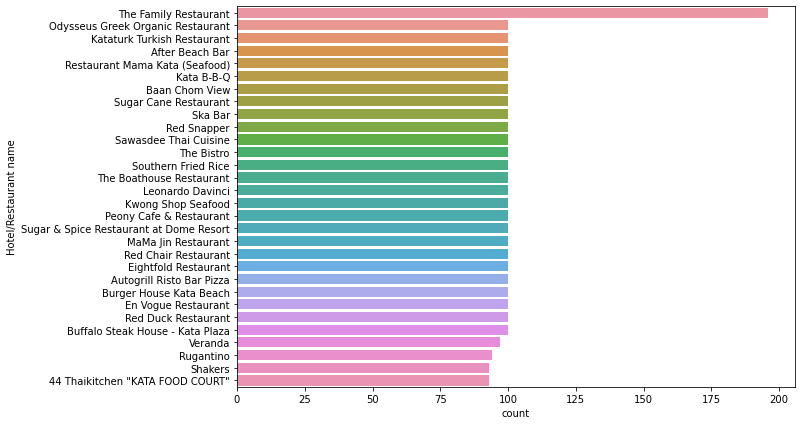

In [33]:
plt.figure(figsize=(10,7))
sns.countplot(y='Hotel/Restaurant name', data=hotels_rest, order=hotels_rest['Hotel/Restaurant name'].value_counts().index)
plt.show()

In [34]:
hotels_rest.head(50)

,Hotel/Restaurant name,Review
0,Odysseus Greek Organic Restaurant,Food was tasty and fresh. Fast service. The ow...
1,Odysseus Greek Organic Restaurant,Great variety of Greek dishes and fantastic se...
2,Odysseus Greek Organic Restaurant,We had an excellent culinary experience at thi...
3,Odysseus Greek Organic Restaurant,Amazing service and food! Highly recommend if ...
4,Odysseus Greek Organic Restaurant,This restaurant is tucked away near the square...
5,Odysseus Greek Organic Restaurant,Had possibly the best meal we have had in Kata...
6,Odysseus Greek Organic Restaurant,We thoroughly enjoyed our experience at this r...
7,Odysseus Greek Organic Restaurant,The food is great! Loved the pork gyros so muc...
8,Odysseus Greek Organic Restaurant,Food was really good and had very clean premis...
9,Odysseus Greek Organic Restaurant,"A lovely little restaurant! Food was lovely, s..."


In [35]:
def lemmatizer(text):
    return [word.lemma_ for word in english(text)]

def data_preprocess(text):
    text = str(text)
    text = re.findall('[a-zA-Z]+', text) #Extract alphabets and filter out numbers/symbols
    text = ' '.join([x for x in text if len(x)>1]) #Join elements in text and separate by string
    text = text.lower()
    text = ' '.join([word for word in text.split() if word not in STOP_WORDS])
    lemmatized = lemmatizer(text)
    cleaned = ' '.join(lemmatized)
    return cleaned

#Using stop- words has the disadvantage of removing words that might alter the sentiment of a text e.g 'Not recommended will be changed to 'recommended'

In [36]:
hotels_rest.loc[:,'Review_processed'] = hotels_rest.loc[:,'Review'].apply(data_preprocess)
hotels_rest

,Hotel/Restaurant name,Review,Review_processed
0,Odysseus Greek Organic Restaurant,Food was tasty and fresh. Fast service. The ow...,food tasty fresh fast service owner super frie...
1,Odysseus Greek Organic Restaurant,Great variety of Greek dishes and fantastic se...,great variety greek dish fantastic service sta...
2,Odysseus Greek Organic Restaurant,We had an excellent culinary experience at thi...,excellent culinary experience new restaurant p...
3,Odysseus Greek Organic Restaurant,Amazing service and food! Highly recommend if ...,amazing service food highly recommend look gre...
4,Odysseus Greek Organic Restaurant,This restaurant is tucked away near the square...,restaurant tuck away near square go trip advis...
...,...,...,...
3068,Buffalo Steak House - Kata Plaza,"not amazing bit expensive for what it is, woul...",amazing bit expensive wouldn recommend service...
3069,Buffalo Steak House - Kata Plaza,I went here on a week night. Since they took A...,go week night take american express currency e...
3070,Buffalo Steak House - Kata Plaza,We came here by mistake!\r\nWe read the mixed ...,come mistake read mixed review want avoid plac...
3071,Buffalo Steak House - Kata Plaza,"Pros:\r\nAtmosphere is good, free salad, manag...",pro atmosphere good free salad manager willing...


In [37]:
for example in [100, 200]:
    print ('Original\n*****************')
    print(hotels_rest.Review.iloc[example])
    print('_________________\nCleaned\n*****************')
    print(hotels_rest.Review_processed.iloc[example])
    print('')

Original
*****************
In our 10 day honeymoon while we stayed in the Vijit Resort at Hawa´ we have visited this restaurant atleast 5 times, that's how great it is.
We come from the Netherlands and have problems with the food hygiÙne in Thailand. This is the only...More
_________________
Cleaned
*****************
day honeymoon stay vijit resort hawa visit restaurant atleast time great come netherlands problem food hygi ne thailand

Original
*****************
I have been eating here for many years and the food is always top quality. I prefer the Israeli food, but the Thai is also great. Friendly staff. Highly recommended.
_________________
Cleaned
*****************
eat year food quality prefer israeli food thai great friendly staff highly recommend



## Most frequent words

In [38]:
#Count vectorizer gives a bag-of-words, which is the text converted to vectors, which are numbers that can be processed by manchine learning models
#The words are arranged in a table format with all the words as columns and the frequency of appearance in each observation as rows
cv = CountVectorizer(stop_words='english') #To drop any stopwords left
data_cv = cv.fit_transform(hotels_rest['Review_processed'])  #this results in a sparse matrix
data_cv.toarray() #converts into an array


array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [39]:
words_df = pd.DataFrame(data_cv.toarray(), columns=cv.get_feature_names_out())
words_df.head()

,aaa,aaannndd,aback,abc,abd,abf,able,abound,abroad,abrupt,...,yum,yummie,yummmmmy,yummy,zero,zinger,zlatan,zoom,zucchini,zufrieden
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


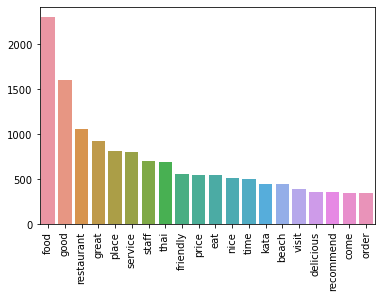

In [40]:
#To view the top 20 most frequent words in the reviews
freq_20 = words_df.sum(axis=0).sort_values(ascending=False)[:20]
sns.barplot(x=freq_20.index, y=freq_20.values)
plt.xticks(rotation=90)
plt.show()

### WordCloud visuals

In [44]:
fulltext=' '.join(word for word in hotels_rest.Review_processed)

In [45]:
def cloud_plot(word_cloud):
    plt.figure(figsize=(17,10))
    plt.imshow(word_cloud, interpolation='bilinear')
    plt.axis('off')
    plt.show()

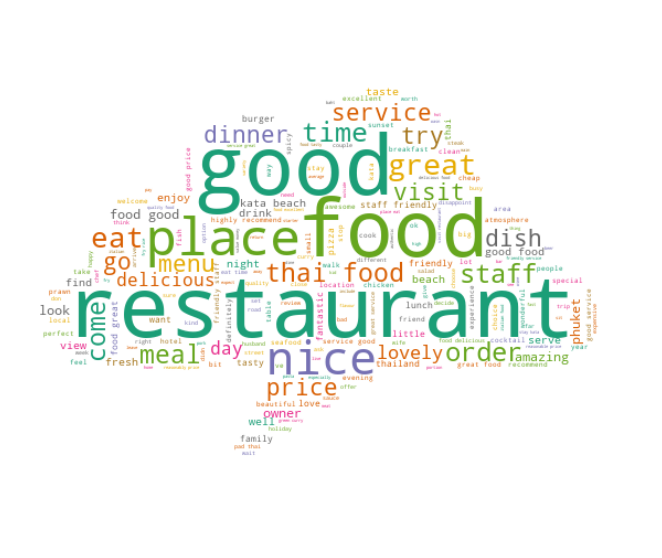

In [46]:
cloud_com = np.array(Image.open("cloud1.png"))
wc=WordCloud(background_color='white',
            colormap='Dark2',
            random_state=42,
            collocations=True,
            mask=cloud_com).generate(fulltext)
cloud_plot(wc)

## Sentiment Classification

In [47]:
polarity = lambda review: TextBlob(review).sentiment.polarity
subjectivity = lambda review: TextBlob(review).sentiment.subjectivity

In [48]:
hotels_rest.loc[:,'Polarity'] = hotels_rest.loc[:, 'Review_processed'].apply(polarity)
hotels_rest.loc[:,'Subjectivity'] = hotels_rest.loc[:, 'Review_processed'].apply(subjectivity)

In [49]:
hotels_rest['Sentiment'] = 'Neutral'
hotels_rest['Sentiment'] = np.where(hotels_rest['Polarity'] >= 0.05, 'positive', hotels_rest['Sentiment'])
hotels_rest['Sentiment'] = np.where(hotels_rest['Polarity'] <= -0.05, 'negative', hotels_rest['Sentiment'])

In [50]:
hotels_rest

,Hotel/Restaurant name,Review,Review_processed,Polarity,Subjectivity,Sentiment
0,Odysseus Greek Organic Restaurant,Food was tasty and fresh. Fast service. The ow...,food tasty fresh fast service owner super frie...,0.361389,0.592778,positive
1,Odysseus Greek Organic Restaurant,Great variety of Greek dishes and fantastic se...,great variety greek dish fantastic service sta...,0.429167,0.583333,positive
2,Odysseus Greek Organic Restaurant,We had an excellent culinary experience at thi...,excellent culinary experience new restaurant p...,0.427189,0.491246,positive
3,Odysseus Greek Organic Restaurant,Amazing service and food! Highly recommend if ...,amazing service food highly recommend look gre...,0.315000,0.510000,positive
4,Odysseus Greek Organic Restaurant,This restaurant is tucked away near the square...,restaurant tuck away near square go trip advis...,0.450000,0.525000,positive
...,...,...,...,...,...,...
3068,Buffalo Steak House - Kata Plaza,"not amazing bit expensive for what it is, woul...",amazing bit expensive wouldn recommend service...,-0.091667,0.541667,negative
3069,Buffalo Steak House - Kata Plaza,I went here on a week night. Since they took A...,go week night take american express currency e...,0.350000,0.300000,positive
3070,Buffalo Steak House - Kata Plaza,We came here by mistake!\r\nWe read the mixed ...,come mistake read mixed review want avoid plac...,-0.250000,0.500000,negative
3071,Buffalo Steak House - Kata Plaza,"Pros:\r\nAtmosphere is good, free salad, manag...",pro atmosphere good free salad manager willing...,-0.037500,0.727083,Neutral


In [51]:
hotels_rest['Sentiment'] = 'Neutral'
hotels_rest['Sentiment'] = np.where(hotels_rest['Polarity'] >= 0.05, 'Positive', hotels_rest['Sentiment'])
hotels_rest['Sentiment'] = np.where(hotels_rest['Polarity'] <= -0.05, 'Negative', hotels_rest['Sentiment'])

In [52]:
hotels_rest.head()

,Hotel/Restaurant name,Review,Review_processed,Polarity,Subjectivity,Sentiment
0,Odysseus Greek Organic Restaurant,Food was tasty and fresh. Fast service. The ow...,food tasty fresh fast service owner super frie...,0.361389,0.592778,Positive
1,Odysseus Greek Organic Restaurant,Great variety of Greek dishes and fantastic se...,great variety greek dish fantastic service sta...,0.429167,0.583333,Positive
2,Odysseus Greek Organic Restaurant,We had an excellent culinary experience at thi...,excellent culinary experience new restaurant p...,0.427189,0.491246,Positive
3,Odysseus Greek Organic Restaurant,Amazing service and food! Highly recommend if ...,amazing service food highly recommend look gre...,0.315000,0.510000,Positive
4,Odysseus Greek Organic Restaurant,This restaurant is tucked away near the square...,restaurant tuck away near square go trip advis...,0.450000,0.525000,Positive


In [53]:
hotels_rest.Sentiment.value_counts(normalize=True)

Positive    0.879271
Negative    0.067035
Neutral     0.053693
Name: Sentiment, dtype: float64

<AxesSubplot:xlabel='Sentiment', ylabel='count'>

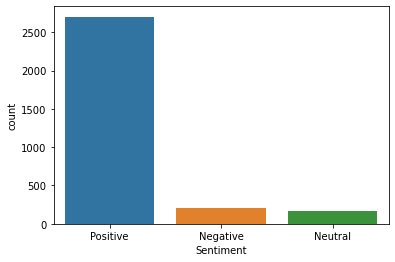

In [54]:
sent_viz = sns.countplot(data=hotels_rest, x=hotels_rest.Sentiment)
sent_viz

In [55]:
new_list = []
def hotel_sentiment(df):
    hotels_list = df['Hotel/Restaurant name'].unique()
    for hotels in hotels_list:
        new_df = df[df['Hotel/Restaurant name'] == hotels]
        counts = new_df['Sentiment'].value_counts()
        new_list.append(counts)
        print(hotels)
        print(counts)
        print('')
hotel_sentiment(hotels_rest)

Odysseus Greek Organic Restaurant
Positive    93
Negative     4
Neutral      3
Name: Sentiment, dtype: int64

Kataturk Turkish Restaurant
Positive    88
Neutral      8
Negative     4
Name: Sentiment, dtype: int64

The Family Restaurant
Positive    178
Negative      9
Neutral       9
Name: Sentiment, dtype: int64

Red Duck Restaurant
Positive    94
Negative     5
Neutral      1
Name: Sentiment, dtype: int64

En Vogue Restaurant
Positive    95
Negative     3
Neutral      2
Name: Sentiment, dtype: int64

Burger House Kata Beach
Positive    91
Negative     5
Neutral      4
Name: Sentiment, dtype: int64

Autogrill Risto Bar Pizza
Positive    90
Negative     6
Neutral      4
Name: Sentiment, dtype: int64

Eightfold Restaurant
Positive    91
Neutral      5
Negative     4
Name: Sentiment, dtype: int64

Red Chair Restaurant
Positive    87
Neutral     10
Negative     3
Name: Sentiment, dtype: int64

MaMa Jin Restaurant
Positive    91
Neutral      7
Negative     2
Name: Sentiment, dtype: int64

S

In [56]:
def sentiments(df):
    list_of_dicts = []
    hotels = df['Hotel/Restaurant name'].unique()
    for hotel in hotels:
        new_df = df[df['Hotel/Restaurant name'] == hotel]
        counts = new_df['Sentiment'].value_counts(normalize=True).round(2)
        
        try:
            positive=counts['Positive']*100
        except KeyError:
            positive=0
        
        try:
            negative=counts['Negative']*100
        except KeyError:
            negative=0
            
        try:
            neutral=counts['Neutral']*100
        except KeyError:
            neutral=0
            
        df_1={
            'Hotel/Restaurant name': hotel,
            'Positive(%)': positive,
            'Neutral(%)': neutral,
            'Negative(%)': negative
        }
        list_of_dicts.append(df_1)
        
    df_func = pd.DataFrame(list_of_dicts)
    return df_func


In [57]:
sentiment_df = sentiments(hotels_rest)
sentiment_df

,Hotel/Restaurant name,Positive(%),Neutral(%),Negative(%)
0,Odysseus Greek Organic Restaurant,93.0,3.0,4.0
1,Kataturk Turkish Restaurant,88.0,8.0,4.0
2,The Family Restaurant,91.0,5.0,5.0
3,Red Duck Restaurant,94.0,1.0,5.0
4,En Vogue Restaurant,95.0,2.0,3.0
5,Burger House Kata Beach,91.0,4.0,5.0
6,Autogrill Risto Bar Pizza,90.0,4.0,6.0
7,Eightfold Restaurant,91.0,5.0,4.0
8,Red Chair Restaurant,87.0,10.0,3.0
9,MaMa Jin Restaurant,91.0,7.0,2.0


In [58]:
hotels_list = hotels_rest['Hotel/Restaurant name'].unique().tolist()
series_list = [pd.Series(new_list[i], name=hotels_list[i]) for i in range(30)]
final_rest = pd.concat([x for x in series_list], axis=1)
final_rest

,Odysseus Greek Organic Restaurant,Kataturk Turkish Restaurant,The Family Restaurant,Red Duck Restaurant,En Vogue Restaurant,Burger House Kata Beach,Autogrill Risto Bar Pizza,Eightfold Restaurant,Red Chair Restaurant,MaMa Jin Restaurant,...,Sawasdee Thai Cuisine,Rugantino,Red Snapper,Ska Bar,Sugar Cane Restaurant,Baan Chom View,Kata B-B-Q,Restaurant Mama Kata (Seafood),After Beach Bar,Buffalo Steak House - Kata Plaza
Positive,93,88,178,94,95,91,90,91,87,91,...,94,77,78,87,94,83,79,80,86,69
Negative,4,4,9,5,3,5,6,4,3,2,...,3,9,13,5,3,8,16,14,11,12
Neutral,3,8,9,1,2,4,4,5,10,7,...,3,8,9,8,3,9,5,6,3,19


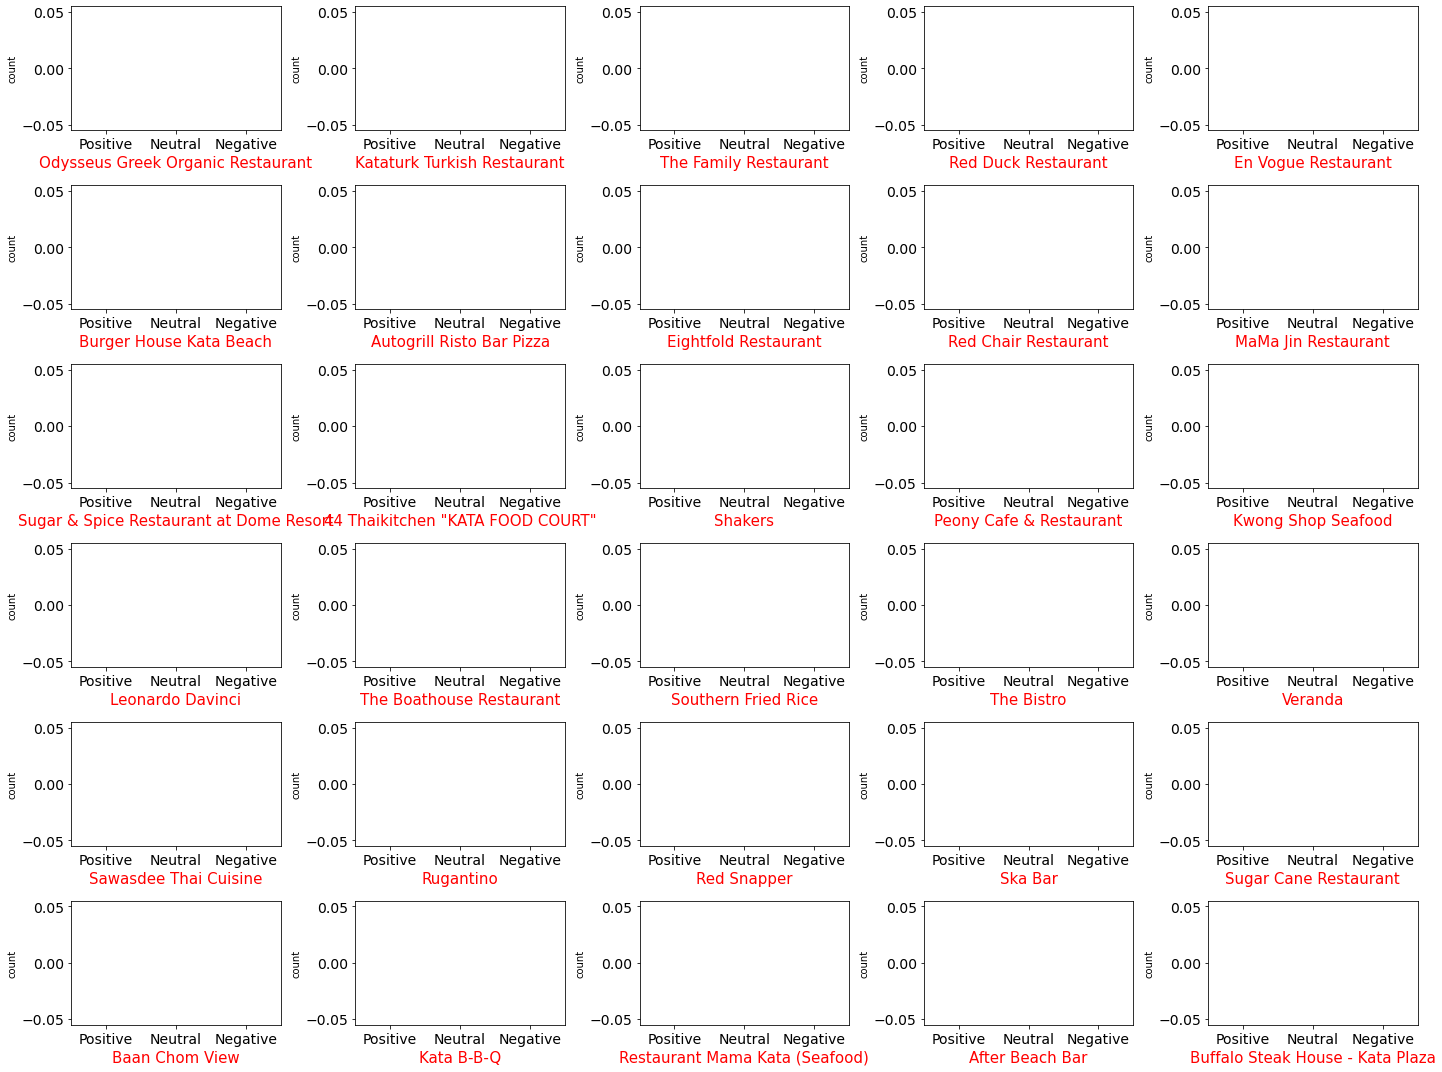

In [59]:
plt.figure(figsize=(20,15))
order = ['Positive', 'Neutral', 'Negative']
for i in range(30):
    plt.subplot(6,5,i+1)
    plt.tight_layout()
    plt.tick_params(axis='both', which='major', labelsize=14)
    plt.xlabel('xlabel', fontsize=15, color='red')
    sns.countplot(data=final_rest, x=final_rest.columns.tolist()[i], order = order)

In [60]:
for i in [29, 35, 103]:
    print(hotels_rest[hotels_rest.Sentiment == 'Positive']['Review'][i])
    print('')
    print('***********************************************')

Greek cuisine! The best cuisine!! Very good restaurant! The food was very nice and tasty! Recommended!

***********************************************
The staff is very friendly and the food is beyond belief, fresh every ingredient is coming from a selected area!
Recommended!

***********************************************
Ate here on my last day in Phuket and have been craving it ever since. The food was sensational and the service was just as impressive. Highly recommended.

***********************************************


In [61]:
for i in [111, 68, 45]:
    print(hotels_rest[hotels_rest.Sentiment == 'Neutral']['Review'][i])
    print('')
    print('***********************************************')

We lived in Turkey for 5 years and have missed so much about this lovely country, from the food, to the history, to the warmth of the Turkish people.
We went to K. Ataturk because a friend recommended it and were NOT disappointed. The menu...More

***********************************************
Was expecting big things and left totally disappointed the food was ok the timing of the food was terrible the owner seemed high on drugs the food i had was ok but the other quests in my party were far from Happy don't know where...More

***********************************************
We went there (2 couples), and I felt like going home to my favourite restaurant. Everyone very friendly and Chef Dimitiris came out to give us his recommendations. Pretty much the service you would pay in Europe for a really expensive restaurant. Also he invited...More

***********************************************


In [62]:
for i in [495, 133, 817]:
    print(hotels_rest[hotels_rest.Sentiment == 'Negative']['Review'][i])
    print('')
    print('***********************************************')

Unfortunately my review is impeded with the fact we waited so long for food. The restaurant was not busy but we were told at the end that they were short staffed. Each meal came out in at different times with the wait from the first...More

***********************************************
After asking specifically if the wine and beers were served ice cold we were assured but then served with room temperature drinks.Bad vibes immediately so after sending the beers back and once again being served with the same we decided to leave.
The owner followed...More

***********************************************
Very overpriced. Portion is extremely small, not enough to feed an adult. Red curry is best out of 5 dishes we ordered. Disappointed upon arrival, I guess the overwhelming reviews on TripAdvisor are based on the fact that they have burgers for people who prefer...More

***********************************************
